# Lab Segmentation 2

In [1]:
from commonfunctions import *
from skimage.color import rgb2gray,rgb2hsv,rgba2rgb
%matplotlib inline
%load_ext autoreload
%autoreload 2

[[0.61568627 0.61568627 0.61568627 ... 0.59607843 0.6        0.59607843]
 [0.61960784 0.61960784 0.61960784 ... 0.61176471 0.61176471 0.60392157]
 [0.61960784 0.61960784 0.61960784 ... 0.6        0.59607843 0.58431373]
 ...
 [0.45490196 0.49019608 0.49019608 ... 0.55294118 0.52156863 0.45882353]
 [0.47843137 0.47843137 0.49411765 ... 0.50588235 0.4745098  0.4627451 ]
 [0.45882353 0.52156863 0.50196078 ... 0.52941176 0.49803922 0.44313725]]
137.0
135.0
148.5
108.5


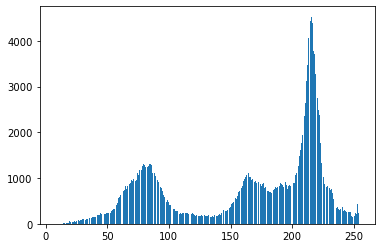

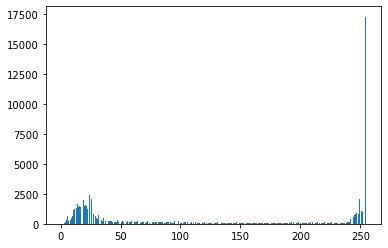

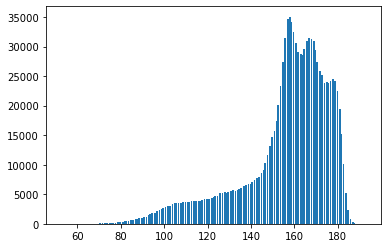

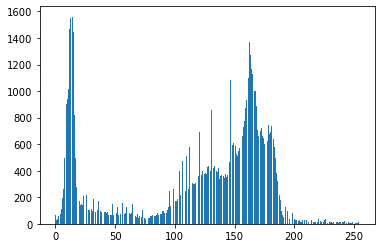

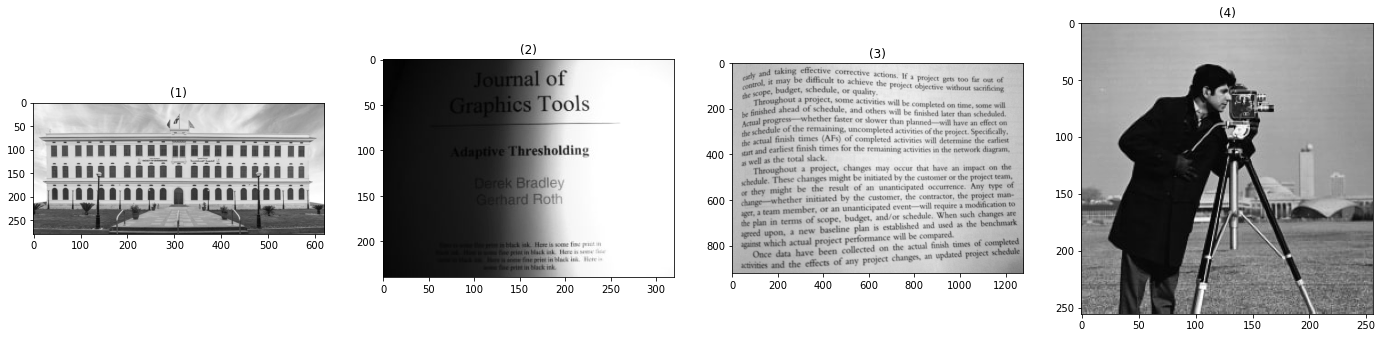

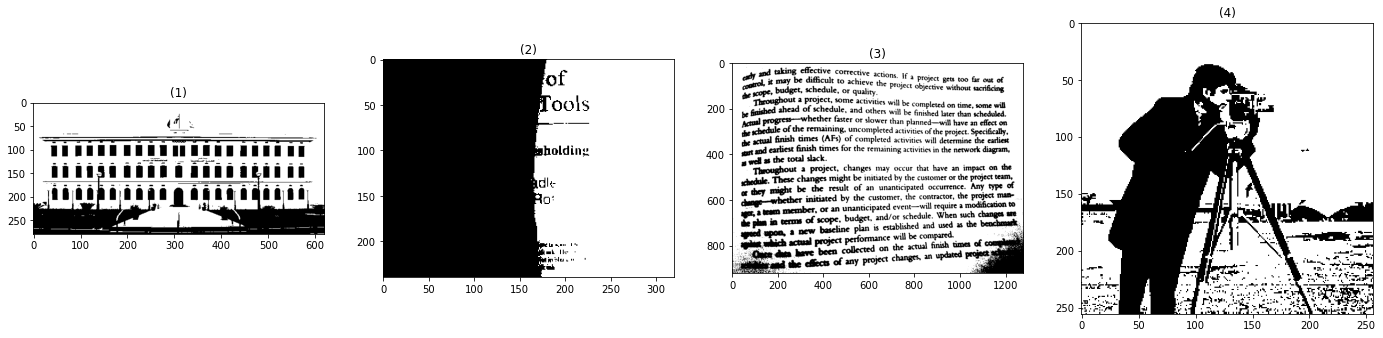

In [2]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')
    
def get_mean( st , end , histogram ):
    mean = 0
    total= 0
    for i in range (st , end):
        mean = mean + i * histogram[i]
        total = total + histogram[i]
    if total ==0:
        mean =0
    else:
        mean = mean / total
    return np.round(mean)

def getThreshold(img):
    img = img * 255
    img = img.astype(np.uint8)
    
    histogram, bin_edges = np.histogram(img/255.0, bins=256)
    bin_edges3 = bin_edges[0:256]
    hist = [histogram,bin_edges3]
    showHist(None ,hist )
    
    #prev_mean = get_mean(0, len(histogram) , histogram)
    #intialization for the first step
    # it is sensetive to the intialization
    backgrountIntial = 4/len(histogram)
    object1Intial = len(histogram)-4 / len(histogram)
    prev_mean = (backgrountIntial + object1Intial) / 2
    
    mean = 256
    while (mean != prev_mean):
        background = get_mean(0 , int(prev_mean) , histogram)
        object1 = get_mean(int(prev_mean) , len(histogram) , histogram)
        if mean != 256:
            prev_mean = mean
        mean = (background+object1)/2
    return mean


cufe = rgb2gray(io.imread('cufe.png'))
book = rgb2gray(io.imread('book.jpg'))
book11 = rgb2gray(io.imread('book1.jpg'))
cameraman = rgb2gray(io.imread('cameraman.jpg'))
print(cameraman)


cufeResult = getThreshold(cufe)
bookResult = getThreshold(book)
book11Result = getThreshold(book11)
cameraManResult = getThreshold(cameraman)

print(cufeResult)
print(bookResult)
print(book11Result)
print(cameraManResult)

cufeRes  = 1.0*( np.copy(cufe) > cufeResult/255)
bookRes  = 1.0*( np.copy(book) > bookResult/255)
book11Res  = 1.0*( np.copy(book11) > book11Result/255)
cameramanRes  = 1.0*( np.copy(cameraman) > cameraManResult/255)

show_images([cufe,book, book11 , cameraman ])
show_images([cufeRes , bookRes , book11Res , cameramanRes ])
    

(240, 320)
135.0


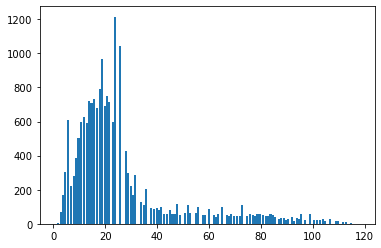

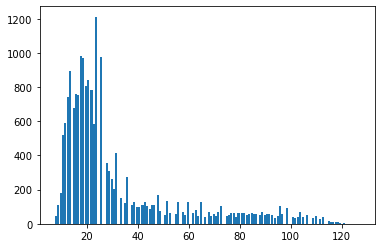

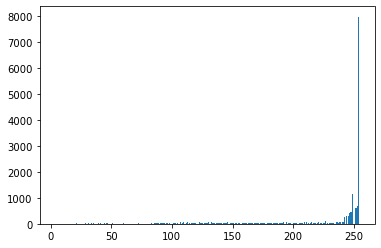

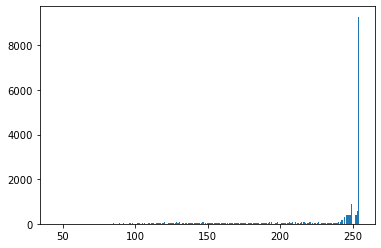

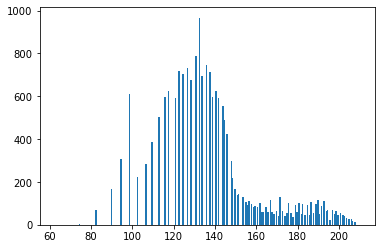

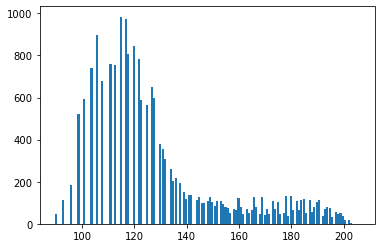

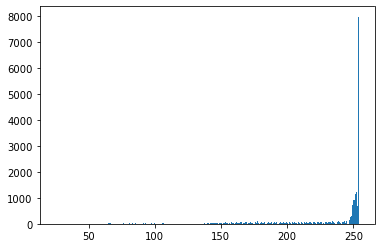

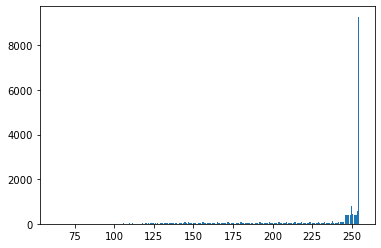

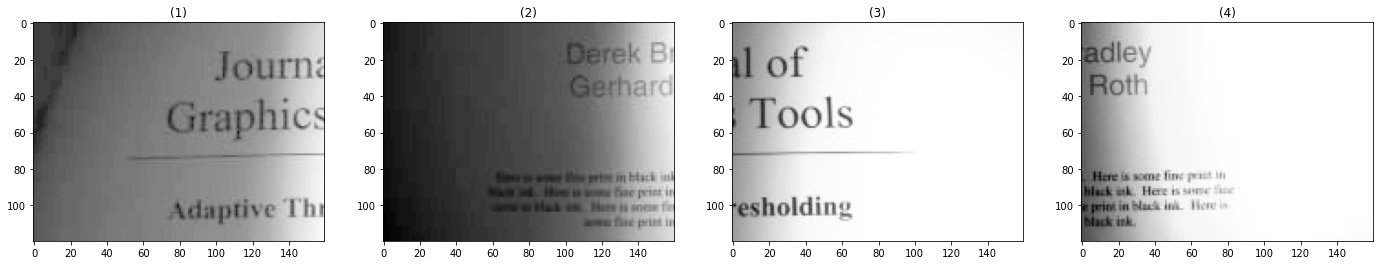

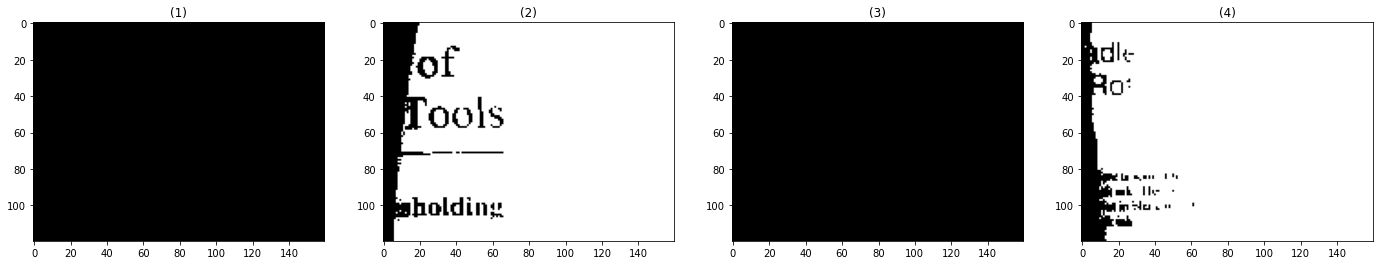

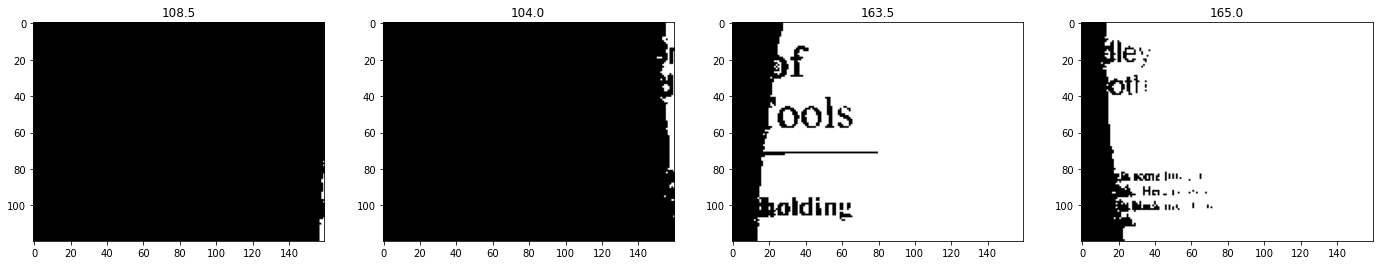

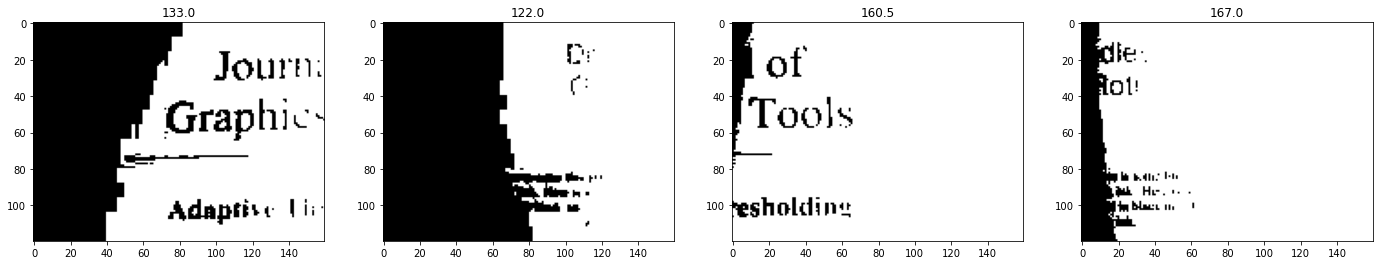

In [3]:
def gammaCorrection(img , c , gamma):
    img3 = np.copy(img)
    img3= (img3**gamma) * c
    return img3

c=1

# decreaing gamma lead to lighter and vice versa

print(book.shape)
height= book.shape[1]
width = book.shape[0]

height1= bookRes.shape[1]
width1 = bookRes.shape[0]
#book1 will be enhanced when we apply local thresholding

book1r = bookRes[0:int(width1/2) , 0:int(height1/2)]
book2r = bookRes[0:int(width1/2) , int(height1/2):height1]
book3r = bookRes[int(width1/2):width1 , 0:int(height1/2)]
book4r = bookRes[int(width1/2):width1 , int(height1/2):height1]


book1 = book[0:int(width/2) , 0:int(height/2)]

book3 = book[0:int(width/2) , int(height/2):height]

book2 = book[int(width/2):width , 0:int(height/2)]

book4 = book[int(width/2):width , int(height/2):height]


print(bookResult)

book1Result1 = getThreshold(book1)
book1Res1  = 1.0*( np.copy(book1) > book1Result1/255)

book2Result1 = getThreshold(book2)
book2Res1  = 1.0*( np.copy(book2) > book2Result1/255)

book3Result1 = getThreshold(book3)
book3Res1  = 1.0*( np.copy(book3) > book3Result1/255)

book4Result1= getThreshold(book4)
book4Res1 = 1.0*( np.copy(book4) > book4Result1/255)


book1 = gammaCorrection(book1 , c , 0.25)
book2 = gammaCorrection(book2 , c , 0.3)
book3 = gammaCorrection(book3 , c , 0.55)
book4 = gammaCorrection(book4 , c , 0.8)


book1Result = getThreshold(book1)
book1Res  = 1.0*( np.copy(book1) > book1Result/255)

book2Result = getThreshold(book2)
book2Res  = 1.0*( np.copy(book2) > book2Result/255)

book3Result = getThreshold(book3)
book3Res  = 1.0*( np.copy(book3) > book3Result/255)

book4Result = getThreshold(book4)
book4Res  = 1.0*( np.copy(book4) > book4Result/255)

show_images([book1 , book2, book3,book4  ])
show_images([book1r , book2r , book3r , book4r ])
show_images([book1Res1,book2Res1  , book3Res1,book4Res1  ], [book1Result1  ,book2Result1, book3Result1,book4Result1  ])
show_images([book1Res,book2Res  , book3Res,book4Res  ], [book1Result  ,book2Result, book3Result,book4Result  ])